1.1 Pandas and Numpy

In [1]:
import numpy as np
import pandas as pd

1.2 For plotting

In [2]:
import matplotlib.pyplot as plt

1.3 For modeling

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

1.4 For performance measures

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

1.5 Import the Data Scaler

In [5]:
from sklearn.preprocessing import StandardScaler as ss

1.6 Import PCA class

In [6]:
from sklearn.decomposition import PCA

1.7 For data splitting

In [7]:
from sklearn.model_selection import train_test_split

1.8 Data Preprocessor for binarization

In [8]:
from sklearn import preprocessing

Data importing and viewing the data

In [19]:
data = pd.read_csv("../input/data.csv")
print("Information of data columns and data type:")
print(data.info())

Information of data columns and data type:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null

In [10]:
print("Quick Glance of the data: ")
print(data.head())

Quick Glance of the data: 
         id diagnosis     ...       fractal_dimension_worst  Unnamed: 32
0    842302         M     ...                       0.11890          NaN
1    842517         M     ...                       0.08902          NaN
2  84300903         M     ...                       0.08758          NaN
3  84348301         M     ...                       0.17300          NaN
4  84358402         M     ...                       0.07678          NaN

[5 rows x 33 columns]


In [11]:
print("Data Information: ")
print(data.describe())

Data Information: 
                 id     ...       Unnamed: 32
count  5.690000e+02     ...               0.0
mean   3.037183e+07     ...               NaN
std    1.250206e+08     ...               NaN
min    8.670000e+03     ...               NaN
25%    8.692180e+05     ...               NaN
50%    9.060240e+05     ...               NaN
75%    8.813129e+06     ...               NaN
max    9.113205e+08     ...               NaN

[8 rows x 32 columns]


In [12]:
print("Shape of the Data: ")
print(data.shape)

Shape of the Data: 
(569, 33)


Data Binarization M = 1 , B = 0

In [20]:
print("Original Values in the diagnosis column and their count: ")
print(data['diagnosis'].value_counts())


Original Values in the diagnosis column and their count: 
B    357
M    212
Name: diagnosis, dtype: int64


Binarizing now

In [22]:

lb = preprocessing.LabelBinarizer()
data['diagnosis'] = lb.fit_transform(data['diagnosis'])

In [26]:
print("Looking for the data categories: ")
print(lb.classes_)

Looking for the data categories: 
['B' 'M']


In [27]:
print("Check the bindarized data: ")
print(data['diagnosis'].value_counts())

Check the bindarized data: 
0    357
1    212
Name: diagnosis, dtype: int64


Droppping the unwanted columns

In [28]:
data = data.drop(["id", "Unnamed: 32"], axis=1)

Splitting the Features and Target Data into X and y

In [29]:
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"].values
print(X.shape)
print(y.shape)

(569, 30)
(569,)


Scale the data

In [30]:
scale = ss()
X = scale.fit_transform(X)
print(X.shape)
print(X[:5,:])

(569, 30)
[[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00  9.84374905e-01
   1.56846633e+00  3.28351467e+00  2.65287398e+00  2.53247522e+00
   2.21751501e+00  2.25574689e+00  2.48973393e+00 -5.65265059e-01
   2.83303087e+00  2.48757756e+00 -2.14001647e-01  1.31686157e+00
   7.24026158e-01  6.60819941e-01  1.14875667e+00  9.07083081e-01
   1.88668963e+00 -1.35929347e+00  2.30360062e+00  2.00123749e+00
   1.30768627e+00  2.61666502e+00  2.10952635e+00  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
  -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
   1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
   2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
  -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
   1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
  -3.75611957e-01 -4.30444219e-01 -1.46748968e-01  1.08708430e+00
  -2.43889668e-01  2.81189987e-

Apply PCA

In [31]:
pca = PCA(n_components = 0.95)
X = pca.fit_transform(X)
print(X.shape)
print(X[:5,:])

(569, 10)
[[ 9.19283683  1.94858307 -1.12316616  3.6337309  -1.19511012  1.41142445
   2.15936987 -0.39840723 -0.15711836 -0.87740188]
 [ 2.3878018  -3.76817174 -0.52929269  1.11826386  0.62177498  0.02865635
   0.01335809  0.24098846 -0.71190482  1.10699494]
 [ 5.73389628 -1.0751738  -0.55174759  0.91208267 -0.1770859   0.54145215
  -0.66816648  0.09737374  0.02406564  0.4542754 ]
 [ 7.1229532  10.27558912 -3.23278955  0.15254703 -2.9608784   3.05342182
   1.4299107   1.05956524 -1.40543967 -1.11697527]
 [ 3.93530207 -1.94807157  1.38976673  2.94063935  0.5467474  -1.22649464
  -0.93621255  0.63637606 -0.26380546  0.37770447]]


Explained Variance

In [32]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]
[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881]


Split and shuffle data

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True )

Create default classifiers

In [33]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)
etc = ExtraTreesClassifier(n_estimators=100)
knc = KNeighborsClassifier()
xg = XGBClassifier(learning_rate=0.5, reg_alpha= 5, reg_lambda= 0.1)
gbm = GradientBoostingClassifier()

Train data

In [37]:
dt1 = dt.fit(X_train,y_train)
rf1 = rf.fit(X_train,y_train)
etc1 = etc.fit(X_train,y_train)
knc1 = knc.fit(X_train,y_train)
xg1 = xg.fit(X_train,y_train)
gbm1 = gbm.fit(X_train,y_train)

Make predictions

In [38]:
y_pred_dt = dt1.predict(X_test)
y_pred_rf = rf1.predict(X_test)
y_pred_etc= etc1.predict(X_test)
y_pred_knc= knc1.predict(X_test)
y_pred_xg= xg1.predict(X_test)
y_pred_gbm= gbm1.predict(X_test)

Get probability values

In [39]:
y_pred_dt_prob = dt1.predict_proba(X_test)
y_pred_rf_prob = rf1.predict_proba(X_test)
y_pred_etc_prob = etc1.predict_proba(X_test)
y_pred_knc_prob = knc1.predict_proba(X_test)
y_pred_xg_prob = xg1.predict_proba(X_test)
y_pred_gbm_prob= gbm1.predict_proba(X_test)

Calculate accuracy

In [40]:
print("DecisionTreeClassifier: {0}".format(accuracy_score(y_test,y_pred_dt)))
print("RandomForestClassifier: {0}".format(accuracy_score(y_test,y_pred_rf)))
print("ExtraTreesClassifier: {0}".format(accuracy_score(y_test,y_pred_etc)))
print("KNeighborsClassifier: {0}".format(accuracy_score(y_test,y_pred_knc)))
print("XGBClassifier: {0}".format(accuracy_score(y_test,y_pred_xg)))
print("GradientBoostingClassifier: {0}".format(accuracy_score(y_test,y_pred_gbm)))

DecisionTreeClassifier: 0.9239766081871345
RandomForestClassifier: 0.9824561403508771
ExtraTreesClassifier: 0.9766081871345029
KNeighborsClassifier: 0.9707602339181286
XGBClassifier: 0.9649122807017544
GradientBoostingClassifier: 0.9766081871345029


Calculate Confusion Matrix

In [41]:
print("DecisionTreeClassifier: ")
print(confusion_matrix(y_test,y_pred_dt))
print("RandomForestClassifier: ")
print(confusion_matrix(y_test,y_pred_rf))
print("ExtraTreesClassifier: ")
print(confusion_matrix(y_test,y_pred_etc))
print("GradientBoostingClassifier: ")
print(confusion_matrix(y_test,y_pred_gbm))
print("KNeighborsClassifier: ")
print(confusion_matrix(y_test,y_pred_knc))
print("XGBClassifier: ")
print(confusion_matrix(y_test,y_pred_xg))

DecisionTreeClassifier: 
[[94  6]
 [ 7 64]]
RandomForestClassifier: 
[[100   0]
 [  3  68]]
ExtraTreesClassifier: 
[[100   0]
 [  4  67]]
GradientBoostingClassifier: 
[[98  2]
 [ 2 69]]
KNeighborsClassifier: 
[[100   0]
 [  5  66]]
XGBClassifier: 
[[99  1]
 [ 5 66]]


Calculate ROC graph

In [42]:
fpr_dt, tpr_dt, thresholds = roc_curve(y_test, y_pred_dt_prob[: , 1], pos_label= 1)
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_pred_rf_prob[: , 1], pos_label= 1)
fpr_etc, tpr_etc, thresholds = roc_curve(y_test, y_pred_rf_prob[: , 1], pos_label= 1)
fpr_knc, tpr_knc, thresholds = roc_curve(y_test, y_pred_rf_prob[: , 1], pos_label= 1)
fpr_xg, tpr_xg, thresholds = roc_curve(y_test, y_pred_xg_prob[: , 1], pos_label= 1)
fpr_gbm, tpr_gbm,thresholds = roc_curve(y_test, y_pred_gbm_prob[: , 1], pos_label= 1)

Get AUC values

In [43]:
print("DecisionTreeClassifier: {0}".format(auc(fpr_dt,tpr_dt)))
print("RandomForestClassifier: {0}".format(auc(fpr_rf,tpr_rf)))
print("ExtraTreesClassifier: {0}".format(auc(fpr_etc,tpr_etc)))
print("GradientBoostingClassifier: {0}".format(auc(fpr_gbm,tpr_gbm)))
print("KNeighborsClassifier: {0}".format(auc(fpr_knc,tpr_knc)))
print("XGBClassifier: {0}".format(auc(fpr_xg,tpr_xg)))

DecisionTreeClassifier: 0.9207042253521127
RandomForestClassifier: 0.9980985915492958
ExtraTreesClassifier: 0.9980985915492958
GradientBoostingClassifier: 0.9933802816901408
KNeighborsClassifier: 0.9980985915492958
XGBClassifier: 0.9971830985915493


Precision/Recall/F-score for each label (0,1)

In [44]:
print("DecisionTreeClassifier: ")
print(precision_recall_fscore_support(y_test,y_pred_dt))
print("RandomForestClassifier: ")
print(precision_recall_fscore_support(y_test,y_pred_rf))
print("ExtraTreesClassifier: ")
print(precision_recall_fscore_support(y_test,y_pred_etc))
print("GradientBoostingClassifier: ")
print(precision_recall_fscore_support(y_test,y_pred_gbm))
print("KNeighborsClassifier: ")
print(precision_recall_fscore_support(y_test,y_pred_knc))
print("XGBClassifier: ")
print(precision_recall_fscore_support(y_test,y_pred_xg))


DecisionTreeClassifier: 
(array([0.93069307, 0.91428571]), array([0.94      , 0.90140845]), array([0.93532338, 0.90780142]), array([100,  71]))
RandomForestClassifier: 
(array([0.97087379, 1.        ]), array([1.        , 0.95774648]), array([0.98522167, 0.97841727]), array([100,  71]))
ExtraTreesClassifier: 
(array([0.96153846, 1.        ]), array([1.        , 0.94366197]), array([0.98039216, 0.97101449]), array([100,  71]))
GradientBoostingClassifier: 
(array([0.98      , 0.97183099]), array([0.98      , 0.97183099]), array([0.98      , 0.97183099]), array([100,  71]))
KNeighborsClassifier: 
(array([0.95238095, 1.        ]), array([1.        , 0.92957746]), array([0.97560976, 0.96350365]), array([100,  71]))
XGBClassifier: 
(array([0.95192308, 0.98507463]), array([0.99      , 0.92957746]), array([0.97058824, 0.95652174]), array([100,  71]))


1.1 Plot ROC curve now

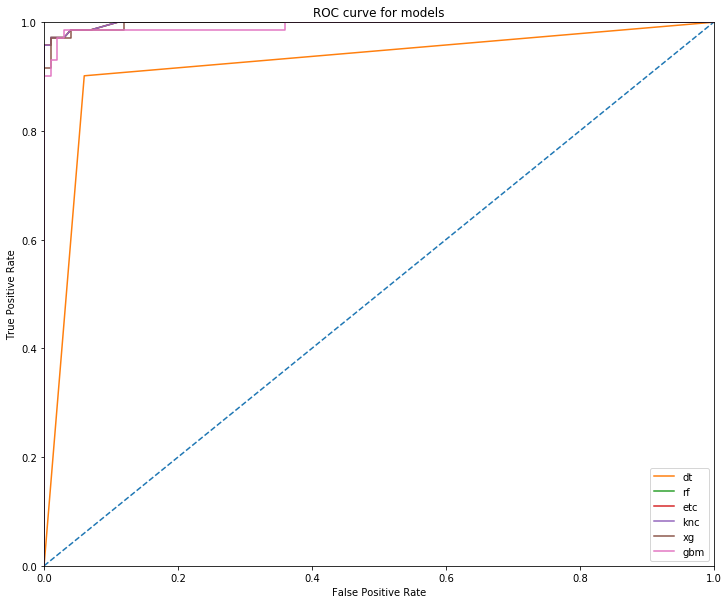

In [45]:
# Plot ROC curve now
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

# Connect diagonals
ax.plot([0, 1], [0, 1], ls="--")   # Dashed diagonal line

# Labels etc
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for models')

# Set graph limits
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

# Plot each graph now
ax.plot(fpr_dt, tpr_dt, label = "dt")
ax.plot(fpr_rf, tpr_rf, label = "rf")
ax.plot(fpr_etc, tpr_etc, label = "etc")
ax.plot(fpr_knc, tpr_knc, label = "knc")
ax.plot(fpr_xg, tpr_xg, label = "xg")
ax.plot(fpr_gbm, tpr_gbm, label = "gbm")

# Set legend and show plot
ax.legend(loc="lower right")
plt.show()